## Download data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Urls with selected MTA data (March, April and May 2019)
urls = [
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190504.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190511.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190518.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190525.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190406.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190413.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190420.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190427.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190302.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190309.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190316.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190323.txt',
    'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190330.txt'
]

In [3]:
# Read csv files in a dataframe
df_list = []
for url in urls:
    df_list.append(pd.read_csv(url))

mta = pd.concat(df_list)

## Data formating

In [4]:
# Check data for missing or null values
mta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653353 entries, 0 to 204594
Data columns (total 11 columns):
C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                 int64
EXITS                                                                   int64
dtypes: int64(2), obj

In [5]:
mta.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
# Rename columns
mta.rename(columns={
    'C/A':'c_a',
    'UNIT':'unit',
    'SCP':'scp',
    'STATION':'station',
    'LINENAME':'linename',
    'DIVISION':'devision',
    'DATE':'date',
    'TIME':'time',
    'DESC':'desc',
    'ENTRIES':'entries',
    'EXITS                                                               ':'exits'
    }, inplace=True)

In [7]:
# Data statistics
mta.describe()

,entries,exits
count,2.653353e+06,2.653353e+06
mean,4.098466e+07,3.366256e+07
std,2.101076e+08,1.943702e+08
min,0.000000e+00,0.000000e+00
25%,3.680650e+05,1.541680e+05
50%,2.245955e+06,1.292873e+06
75%,6.785287e+06,4.638681e+06
max,2.129459e+09,2.124283e+09


In [8]:
#Make a column with a unique ID for each turnstile
mta['turnstile_id'] = mta['c_a'] + ', ' + mta['unit'] + ', '+ mta['scp'] + ', ' + mta['station']
mta.head()

,c_a,unit,scp,station,linename,devision,date,time,desc,entries,exits,turnstile_id
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,"A002, R051, 02-00-00, 59 ST"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,"A002, R051, 02-00-00, 59 ST"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,"A002, R051, 02-00-00, 59 ST"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,"A002, R051, 02-00-00, 59 ST"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,"A002, R051, 02-00-00, 59 ST"


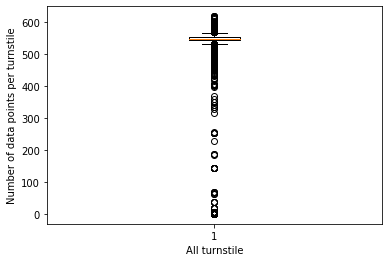

In [9]:
#Some turnstiles lack data. A few have more data points than expected.
plt.boxplot(mta.turnstile_id.value_counts()) 
plt.xlabel('All turnstile', fontsize=10)
plt.ylabel('Number of data points per turnstile', fontsize=10)
plt.savefig('tunstile_missing_data.svg')

In [10]:
# Add datetime and date variables
mta['Datetime'] = pd.to_datetime(mta['date'] + ' ' + mta['time'])
mta['Date'] = pd.to_datetime(mta['date'])

mta.head()

,c_a,unit,scp,station,linename,devision,date,time,desc,entries,exits,turnstile_id,Datetime,Date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,"A002, R051, 02-00-00, 59 ST",2019-04-27 00:00:00,2019-04-27
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,"A002, R051, 02-00-00, 59 ST",2019-04-27 04:00:00,2019-04-27
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,"A002, R051, 02-00-00, 59 ST",2019-04-27 08:00:00,2019-04-27
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,"A002, R051, 02-00-00, 59 ST",2019-04-27 12:00:00,2019-04-27
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,"A002, R051, 02-00-00, 59 ST",2019-04-27 16:00:00,2019-04-27


In [11]:
mta.loc[mta.station=='34 ST-PENN STA']['time'].value_counts()

12:00:00    5829
16:00:00    5818
04:00:00    5818
20:00:00    5816
08:00:00    5786
            ... 
12:44:10       4
19:00:06       3
08:35:18       3
19:00:10       1
19:00:12       1
Name: time, Length: 210, dtype: int64

In [12]:
# Number of unique turnstiles
len(mta.turnstile_id.unique())

4905

In [13]:
# Number of staions
len(mta.station.unique())

379

In [14]:
# Number of unique time points per day
len(mta.time.unique())

62826

In [15]:
# Sort to make sure date is in order (probably do not need it)
mta.sort_values(['turnstile_id', 'Date'])
mta.head()

,c_a,unit,scp,station,linename,devision,date,time,desc,entries,exits,turnstile_id,Datetime,Date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,00:00:00,REGULAR,7035249,2384833,"A002, R051, 02-00-00, 59 ST",2019-04-27 00:00:00,2019-04-27
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,04:00:00,REGULAR,7035269,2384840,"A002, R051, 02-00-00, 59 ST",2019-04-27 04:00:00,2019-04-27
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,08:00:00,REGULAR,7035292,2384875,"A002, R051, 02-00-00, 59 ST",2019-04-27 08:00:00,2019-04-27
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,12:00:00,REGULAR,7035392,2384951,"A002, R051, 02-00-00, 59 ST",2019-04-27 12:00:00,2019-04-27
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/27/2019,16:00:00,REGULAR,7035651,2385020,"A002, R051, 02-00-00, 59 ST",2019-04-27 16:00:00,2019-04-27


In [16]:
# Get minimum reading for each turnstile per day
mta_min = mta.groupby(['turnstile_id', 'Date'])['entries', 'exits', 'station'].min().reset_index()

In [17]:
# Calculating entries and exits per day by subtracting min entries for given day from the next day. 
# Last day values are not calculated due to "the lack of the next day value".
mta_daily = mta_min.copy()
mta_daily['entries_daily'] = mta_daily.groupby(['turnstile_id'])['entries'].diff()
mta_daily['exits_daily'] = mta_daily.groupby(['turnstile_id'])['exits'].diff()

In [18]:
# Fixing the `entries_daily` and `exits_daily`. Shifting up one row
mta_daily['entries_daily'] = mta_daily['entries_daily'].shift(-1)
mta_daily['exits_daily'] = mta_daily['exits_daily'].shift(-1)

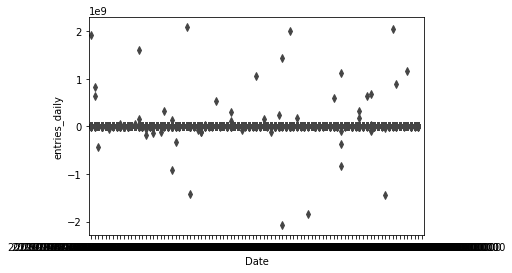

In [19]:
# Outliers in entries over time
sns.boxplot(x='Date', y='entries_daily', data=mta_daily)

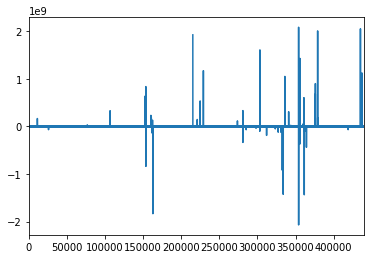

In [20]:
# Outliers in entries over time
mta_daily.entries_daily.plot()

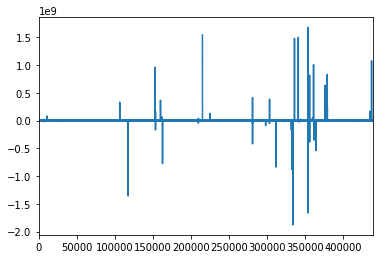

In [21]:
# Outliers in exits over time
mta_daily.exits_daily.plot()

In [22]:
# MTA daily number of passenger per station per day should not be more than ~200,000 (published info). 
# Note, we are looking at individual turnstiles, not stations yet - assume the daily max value to be below 20,000.
mta_daily.entries_daily.max()

2088501681.0

In [23]:
mta_daily.exits_daily.max()

1684280440.0

In [24]:
# Entry values >= 20,000
mta_daily.loc[mta_daily['entries_daily']>=20000]

,turnstile_id,Date,entries,exits,station,entries_daily,exits_daily
7501,"A025, R023, 01-06-01, 34 ST-HERALD SQ",2019-03-05,5196016,8096883,34 ST-HERALD SQ,9.460806e+06,2.236480e+07
11053,"A034, R170, 03-06-00, 14 ST-UNION SQ",2019-03-08,68073706,17234616,14 ST-UNION SQ,1.671340e+08,8.354263e+07
12651,"A038, R085, 00-06-00, 8 ST-NYU",2019-04-28,299330,58,8 ST-NYU,1.640730e+05,1.210000e+02
53672,"D002, R390, 00-03-01, 8 AV",2019-03-04,2378199,1797789,8 AV,2.435900e+04,6.604000e+03
54058,"D004, R391, 01-06-01, FT HAMILTON PKY",2019-04-03,587727,102248,FT HAMILTON PKY,1.990420e+05,-1.022080e+05
...,...,...,...,...,...,...,...
379103,"R405, R447, 01-00-01, CYPRESS AV",2019-04-20,740844,1030141,CYPRESS AV,1.838690e+08,2.506931e+08
397417,"R519, R223, 00-00-00, 46 ST BLISS ST",2019-03-02,777282,1748946,46 ST BLISS ST,6.921300e+05,2.123490e+05
419081,"R610, R057, 00-04-01, ATL AV-BARCLAY",2019-04-11,591919,1087,ATL AV-BARCLAY,1.709869e+06,2.708342e+06
435202,"R729, R292, 00-00-02, BAYCHESTER AV",2019-05-16,8123310,690029,BAYCHESTER AV,2.055526e+09,1.671292e+08


In [25]:
# Exit values >= 20,000
mta_daily.loc[mta_daily['exits_daily']>=20000]

,turnstile_id,Date,entries,exits,station,entries_daily,exits_daily
7410,"A025, R023, 01-06-00, 34 ST-HERALD SQ",2019-03-05,10754832,18233873,34 ST-HERALD SQ,2.578000e+03,8.834196e+06
7501,"A025, R023, 01-06-01, 34 ST-HERALD SQ",2019-03-05,5196016,8096883,34 ST-HERALD SQ,9.460806e+06,2.236480e+07
11053,"A034, R170, 03-06-00, 14 ST-UNION SQ",2019-03-08,68073706,17234616,14 ST-UNION SQ,1.671340e+08,8.354263e+07
26659,"A081, R028, 04-00-03, FULTON ST",2019-04-26,748829,2321723,FULTON ST,7.700000e+01,2.202000e+04
86696,"JFK03, R536, 00-00-04, JFK JAMAICA CT1",2019-05-11,9341,5171,JFK JAMAICA CT1,7.404800e+04,4.667400e+05
...,...,...,...,...,...,...,...
379103,"R405, R447, 01-00-01, CYPRESS AV",2019-04-20,740844,1030141,CYPRESS AV,1.838690e+08,2.506931e+08
397417,"R519, R223, 00-00-00, 46 ST BLISS ST",2019-03-02,777282,1748946,46 ST BLISS ST,6.921300e+05,2.123490e+05
419081,"R610, R057, 00-04-01, ATL AV-BARCLAY",2019-04-11,591919,1087,ATL AV-BARCLAY,1.709869e+06,2.708342e+06
435202,"R729, R292, 00-00-02, BAYCHESTER AV",2019-05-16,8123310,690029,BAYCHESTER AV,2.055526e+09,1.671292e+08


In [26]:
# Entry values < 0
len(mta_daily.loc[mta_daily['entries_daily']<0].turnstile_id.unique())

357

In [27]:
# Exits values < 0
len(mta_daily.loc[mta_daily['exits_daily']<0].turnstile_id.unique())

359

In [28]:
# Look at turnstiles that have negative daily entries 
neg_entries_ones=list(mta_daily.loc[mta_daily['entries_daily']<0].turnstile_id.unique())
len(neg_entries_ones)

357

In [29]:
neg_entries=mta[mta.turnstile_id.isin(neg_entries_ones)][['turnstile_id','Datetime','entries']]
neg_entries.index= neg_entries.Datetime
neg_entries.head()

,turnstile_id,Datetime,entries
Datetime,,,
2019-04-27 00:00:00,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-04-27 00:00:00,1238470573
2019-04-27 04:00:00,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-04-27 04:00:00,1238470329
2019-04-27 08:00:00,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-04-27 08:00:00,1238470235
2019-04-27 12:00:00,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-04-27 12:00:00,1238469915
2019-04-27 16:00:00,"A025, R023, 01-03-01, 34 ST-HERALD SQ",2019-04-27 16:00:00,1238469346


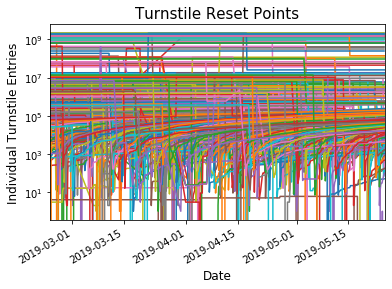

In [30]:
# Turnstile resets

for i in range(len(neg_entries_ones)):
    negs=neg_entries[neg_entries.turnstile_id==neg_entries_ones[i]]
    negs.entries.plot()
    plt.yscale('log')
# negs.head()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Individual Turnstile Entries', fontsize=12)
plt.title('Turnstile Reset Points', fontsize=15)
# plt.figure(figsize=())
plt.savefig('Turnstile_reset.svg')

In [31]:
# Remove the daily enatries and exits that do not make sence (> 20,000 and < 0)
mta_daily_clean = mta_daily.copy()

mta_daily_clean.loc[mta_daily_clean['entries_daily'] >= 20000,'entries_daily'] = np.nan
mta_daily_clean.loc[mta_daily_clean['entries_daily'] < 0,'entries_daily'] = np.nan

mta_daily_clean.loc[mta_daily_clean['exits_daily'] >= 20000,'exits_daily'] = np.nan
mta_daily_clean.loc[mta_daily_clean['exits_daily'] < 0,'exits_daily'] = np.nan

In [32]:
# Daily entries and exits by stations
station_daily = mta_daily_clean.groupby(['station', 'Date'])['entries_daily', 'exits_daily'].sum().reset_index()
station_daily['traffic'] = station_daily['entries_daily'] + station_daily['exits_daily']

In [33]:
station_daily.head()

,station,Date,entries_daily,exits_daily,traffic
0,1 AV,2019-02-23,2.0,144.0,146.0
1,1 AV,2019-02-24,1.0,75.0,76.0
2,1 AV,2019-02-25,18567.0,20745.0,39312.0
3,1 AV,2019-02-26,19762.0,22245.0,42007.0
4,1 AV,2019-02-27,20150.0,22646.0,42796.0


In [34]:
# Sum of entries by stations for March, April and May 2019
station_total = station_daily.groupby(['station'])['entries_daily', 'exits_daily', 'traffic'].sum().reset_index()

In [35]:
# Top 10 staions by total traffic (March, April and May 2019)
station_total.sort_values(['traffic'], ascending=False).head(10)

,station,entries_daily,exits_daily,traffic
61,34 ST-PENN STA,13213388.0,12041248.0,25254636.0
233,GRD CNTRL-42 ST,11541597.0,10194318.0,21735915.0
59,34 ST-HERALD SQ,9174737.0,9009044.0,18183781.0
14,14 ST-UNION SQ,8283773.0,7640462.0,15924235.0
46,23 ST,8939690.0,6560980.0,15500670.0
353,TIMES SQ-42 ST,7964216.0,7528638.0,15492854.0
68,42 ST-PORT AUTH,7461316.0,6378715.0,13840031.0
226,FULTON ST,7421486.0,6262737.0,13684223.0
110,86 ST,6522669.0,5987315.0,12509984.0
9,125 ST,6122705.0,5151031.0,11273736.0


In [36]:
# Daily average traffic for each station
station_daily_mean = station_daily.groupby(['station'])['Date', 'entries_daily', 'exits_daily', 'traffic'].mean()

## Graphs

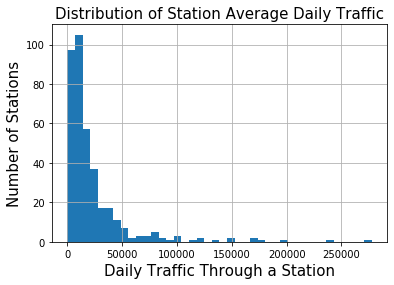

In [37]:
# Distribution of station daily average
station_daily_mean.traffic.hist(bins=40)
plt.title('Distribution of Station Average Daily Traffic', fontsize=15)
plt.xlabel('Daily Traffic Through a Station', fontsize=15)
plt.ylabel('Number of Stations', fontsize=15)
# plt.figure(figsize=(5,5))
plt.savefig('all_station_hist.svg')

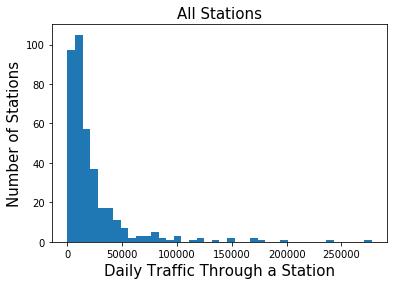

In [38]:
# Distribution of station daily average (no grid)
station_daily_mean.traffic.hist(bins=40)
plt.title('All Stations', fontsize=15)
plt.xlabel('Daily Traffic Through a Station', fontsize=15)
plt.ylabel('Number of Stations', fontsize=15)
# plt.figure(figsize=(5,5))
plt.savefig('all_station_hist.svg', bbox_inches='tight')
plt.grid(None)

In [39]:
# Top 10 busiest stations
top10_daily_mean = station_daily_mean.sort_values(['traffic'], ascending=False)[:10]
top10_daily_mean

,entries_daily,exits_daily,traffic
station,,,
34 ST-PENN STA,145202.065934,132321.406593,277523.472527
GRD CNTRL-42 ST,126830.736264,112025.472527,238856.208791
34 ST-HERALD SQ,100821.285714,99000.483516,199821.769231
14 ST-UNION SQ,91030.472527,83961.120879,174991.593407
23 ST,98238.351648,72098.681319,170337.032967
TIMES SQ-42 ST,87518.857143,82732.285714,170251.142857
42 ST-PORT AUTH,81992.483516,70095.769231,152088.252747
FULTON ST,81554.791209,68821.285714,150376.076923
86 ST,71677.681319,65794.670330,137472.351648


In [40]:
# print top 10 busiest stations
top10_daily_mean.index

Index(['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ',
       '14 ST-UNION SQ', '23 ST', 'TIMES SQ-42 ST', '42 ST-PORT AUTH',
       'FULTON ST', '86 ST', '125 ST'],
      dtype='object', name='station')

In [41]:
top_stations = [
    '34 ST-PENN STA',
    'GRD CNTRL-42 ST',
    '34 ST-HERALD SQ',
    '14 ST-UNION SQ',
    'TIMES SQ-42 ST',
    '23 ST',
    '42 ST-PORT AUTH',
    'FULTON ST', 
    '86 ST', 
    '125 ST'
]

In [42]:
top_station_names = [
    '34 Street Penn Station',
    'Grand Central Terminal',
    '34th Street - Herald Square Station',
    '14th Street - Union Square Station',
    'Times Square - 42nd Street Station',
    '23 Street Station',
    '42 Street - Port Authority Station',
    'Fulton Street Station',
    '86 Street Station',
    '125 Street Station'
]

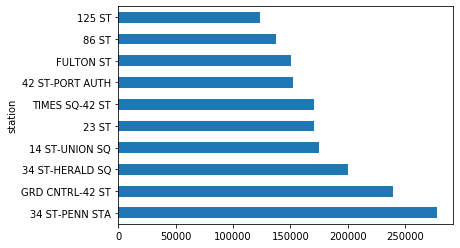

In [43]:
# Top 10 stations by daily mean
top10_daily_mean.traffic.plot.barh('traffic');

In [44]:
top10_daily= station_daily[station_daily.station.isin(top_stations)]
top10_daily.head()
top10_daily

,station,Date,entries_daily,exits_daily,traffic
818,125 ST,2019-02-23,49607.0,43791.0,93398.0
819,125 ST,2019-02-24,36662.0,33767.0,70429.0
820,125 ST,2019-02-25,75379.0,60195.0,135574.0
821,125 ST,2019-02-26,78379.0,61951.0,140330.0
822,125 ST,2019-02-27,79025.0,62546.0,141571.0
...,...,...,...,...,...
32028,TIMES SQ-42 ST,2019-05-20,97403.0,90026.0,187429.0
32029,TIMES SQ-42 ST,2019-05-21,104892.0,96663.0,201555.0
32030,TIMES SQ-42 ST,2019-05-22,107568.0,99649.0,207217.0
32031,TIMES SQ-42 ST,2019-05-23,102304.0,96701.0,199005.0


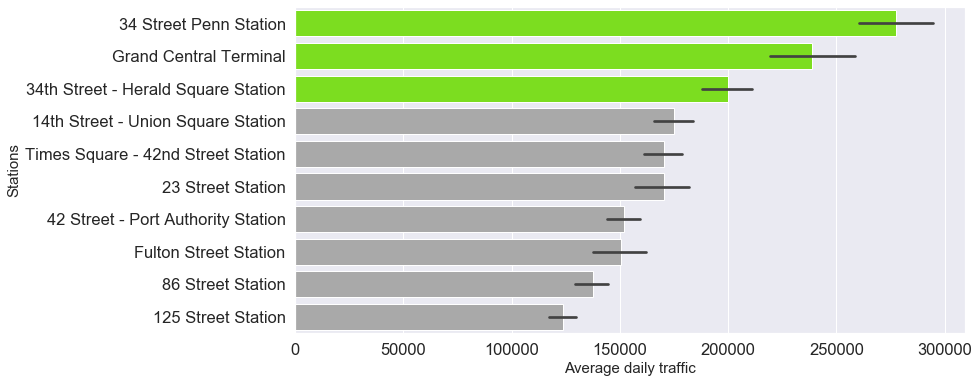

In [45]:
# Stations with the most daily traffic 
color1='#7cfc00'
color2='#a9a9a9'
mypalette = [color1, color1, color1, color2, color2, color2, color2, color2, color2, color2]


plt.figure(figsize=(12, 6))
sns.set(font_scale = 1.5)
chart = sns.barplot(x='traffic', y='station', data=top10_daily, 
            order=top_stations, 
            palette = sns.color_palette(mypalette,10))
chart.set_yticklabels(top_station_names)
plt.xlabel('Average daily traffic', fontsize=15)
plt.ylabel('Stations', fontsize=15)

plt.savefig('top10_barh_1.svg', bbox_inches = 'tight')

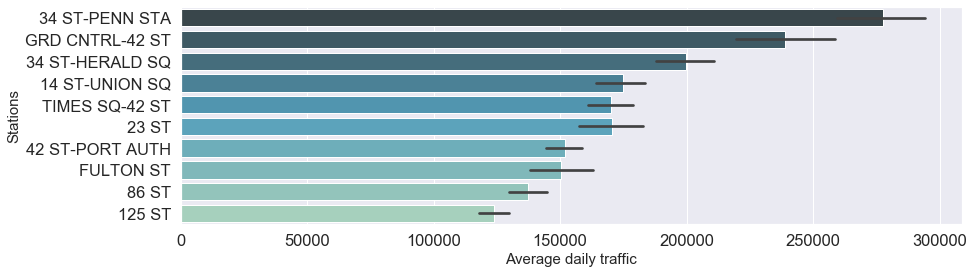

In [46]:
# Stations with the most daily traffic 
plt.figure(figsize=(14, 4))
sns.barplot(x='traffic', y='station', data=top10_daily, 
            order=top_stations, 
            palette = sns.color_palette("GnBu_d",10))
plt.xlabel('Average daily traffic', fontsize=15)
plt.ylabel('Stations', fontsize=15)
plt.savefig('top10_barh.svg')


In [47]:
top10_daily['day_of_week']=top10_daily.Date.dt.dayofweek
top10_daily.head()

/Users/greenapple/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,station,Date,entries_daily,exits_daily,traffic,day_of_week
818,125 ST,2019-02-23,49607.0,43791.0,93398.0,5
819,125 ST,2019-02-24,36662.0,33767.0,70429.0,6
820,125 ST,2019-02-25,75379.0,60195.0,135574.0,0
821,125 ST,2019-02-26,78379.0,61951.0,140330.0,1
822,125 ST,2019-02-27,79025.0,62546.0,141571.0,2


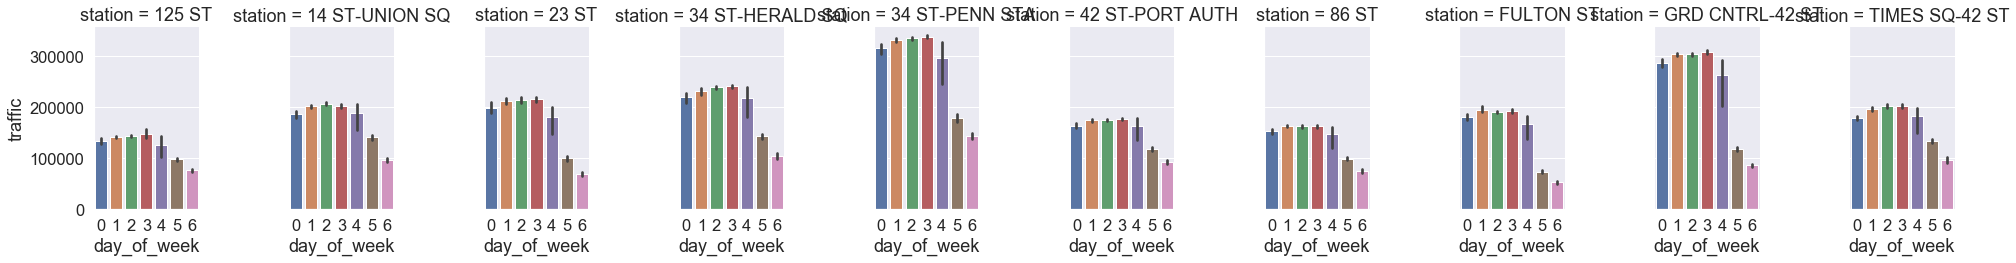

In [48]:
# Daily traffic by day of the week. Top 10 stations.

g = sns.catplot(x="day_of_week", y="traffic", 
                col="station", data=top10_daily, 
                kind="bar", height=4, aspect=.7);

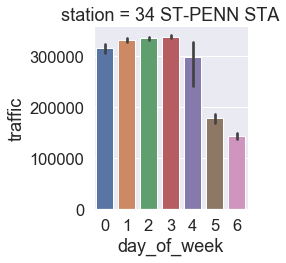

In [49]:
# Daily traffic  by day of the week. Penn station

g = sns.catplot(x="day_of_week", y="traffic", 
            col="station", 
            data=top10_daily[top10_daily.station==top_stations[0]], kind="bar",
            height=4, aspect=1);
plt.savefig('day_time.svg')

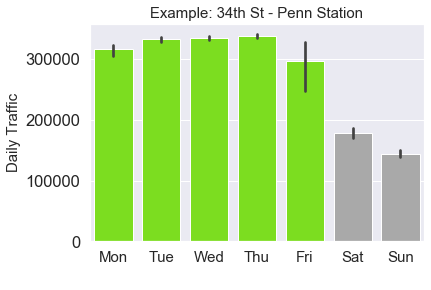

In [50]:
# Daily traffic  by day of the week. Penn station
color1='#7cfc00'
color2='#a9a9a9'
my_palette=[color1,color1,color1,color1,color1,color2,color2]
sns.barplot(x='day_of_week', y='traffic', palette=my_palette, 
                data=top10_daily[top10_daily.station==top_stations[0]])
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=15)
plt.title('Example: 34th St - Penn Station', fontsize=15)
plt.xlabel(' ', fontsize=15)
plt.ylabel('Daily Traffic', fontsize=15)
plt.savefig('wkday.svg', bbox_inches = 'tight')

In [51]:
# Penn station time recomendation
standard_times=['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00']

penn_ts=mta[mta.station==top_stations[0]].copy()
penn_by_time = penn_ts[penn_ts.time.isin(standard_times)].copy()

#penn_by_time = penn_by_time.groupby(['turnstile_id'])['time'].apply()

In [52]:
# Sort by turnstile and time
penn_by_time.sort_values(['turnstile_id', 'Datetime'])
penn_by_time.head()

,c_a,unit,scp,station,linename,devision,date,time,desc,entries,exits,turnstile_id,Datetime,Date
52864,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/27/2019,00:00:00,REGULAR,6226,18077,"N067, R012, 00-00-00, 34 ST-PENN STA",2019-04-27 00:00:00,2019-04-27
52865,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/27/2019,04:00:00,REGULAR,6230,18081,"N067, R012, 00-00-00, 34 ST-PENN STA",2019-04-27 04:00:00,2019-04-27
52866,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/27/2019,08:00:00,REGULAR,6243,18160,"N067, R012, 00-00-00, 34 ST-PENN STA",2019-04-27 08:00:00,2019-04-27
52867,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/27/2019,12:00:00,REGULAR,6306,18347,"N067, R012, 00-00-00, 34 ST-PENN STA",2019-04-27 12:00:00,2019-04-27
52868,N067,R012,00-00-00,34 ST-PENN STA,ACE,IND,04/27/2019,16:00:00,REGULAR,6408,18614,"N067, R012, 00-00-00, 34 ST-PENN STA",2019-04-27 16:00:00,2019-04-27


In [53]:
penn_by_time.time.value_counts()

12:00:00    5829
04:00:00    5818
16:00:00    5818
20:00:00    5816
08:00:00    5786
00:00:00    5772
Name: time, dtype: int64

In [55]:
# Remove entries with fewer than 6 time points per day
time_filter = penn_by_time.groupby(['turnstile_id', 'Date'])['time'].count() == 6

In [56]:
penn_by_time_filtered = penn_by_time.copy()
penn_by_time_filtered = penn_by_time_filtered.groupby(['turnstile_id','Date'])['time'].count()
dates = penn_by_time_filtered[time_filter]
dates = dates.reset_index()
                                                    
dates['turnstile_date']=dates['turnstile_id']+dates['Date'].map(str)

In [58]:
# penn = penn_by_time[penn_by_time.turnstile_date.isin(dates.turnstile_date.values)]
# penn.drop_duplicates()
# penn.shape

In [ ]:
# Calculating entries and exits per time of the day
# Last timestamp values are not calculated due to "the lack of the next value".

#penn.drop('entries_hourly', axis=1, inplace=True)
#penn['entries_hourly'] = penn.groupby(['turnstile_id', 'Date'])['entries'].mean.diff()

# penn_by_time['exits_hourly'] = penn_by_time.groupby(['turnstile_id'])['exits'].diff()

# Does not work